In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('news.csv')

### Looking at the data

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

In [5]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
from fast_ml import eda

summary_df = eda.df_info(df)
summary_df

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Unnamed: 0,int64,Numerical,6335,"[8476, 10294, 3608, 10142, 875, 6903, 7341, 95...",0,0.0
title,object,Categorical,6256,"[You Can Smell Hillary’s Fear, Watch The Exact...",0,0.0
text,object,Categorical,6060,"[Daniel Greenfield, a Shillman Journalism Fell...",0,0.0
label,object,Categorical,2,"[FAKE, REAL]",0,0.0


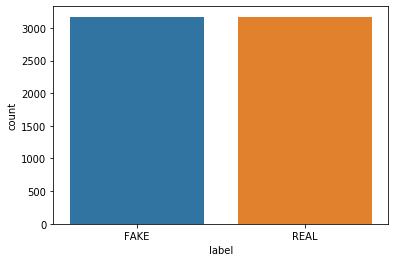

In [8]:
import seaborn as sns
sns.countplot(x=df['label']);

Since the dataset labels are balanced, we can use accuracy as a metric

In [9]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df = df.drop_duplicates()

In [12]:
df['label'].replace('FAKE',1, inplace=True)
df['label'].replace('REAL',0, inplace=True)

In [13]:
df['label'].value_counts()

0    3171
1    3164
Name: label, dtype: int64

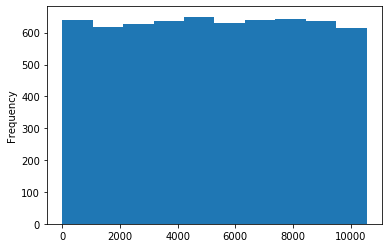

In [14]:
df['Unnamed: 0'].plot.hist();

In [15]:
df['Unnamed: 0'].duplicated().sum()

0

### Since it is a uniform distribution, we will consider this column as an ID for the dataset

In [16]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(2)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1


In [17]:
df['text'].head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [18]:
def wordProcessing(text: str):
    text = text.lower()
    text = re.sub('[.,*,/,|,\,$,#,@,,‘’,'',"",!,—,(),<,>,‹, ›, %,^,&,_,-,-,+,=,<,>,?,;,:]', ' ', text)
    text = re.sub('[1,2,3,4,5,6,7,8,9,0]', ' ', text)
    text = re.sub('www.', ' ', text)
    return text

In [19]:
df['text'] = df['text'].apply(wordProcessing)

In [20]:
df['text'].head()

0    daniel greenfield  a shillman journalism fello...
1    google pinterest digg linkedin reddit stumbleu...
2    u s  secretary of state john f  kerry said mon...
3      kaydee king   kaydeeking  november         t...
4    it's primary day in new york and front runners...
Name: text, dtype: object

### Modeling on the data

In [21]:
x = df['text']
y = df['label']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((5068,), (5068,), (1267,), (1267,))

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer( stop_words ='english' ,max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)


### Implementing Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(tfidf_train, y_train)

LogisticRegression()

In [26]:
LR.score(tfidf_test, y_test)

0.9210734017363852

### Implementing SVMs

In [27]:
from sklearn import svm
svm_model = svm.SVC()

In [28]:
svm_model.fit(tfidf_train, y_train)

SVC()

In [29]:
svm_model.score(tfidf_test, y_test)


0.9297553275453828

### Implementing Decision Trees

In [30]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [31]:
DT.fit(tfidf_train, y_train)

DecisionTreeClassifier()

In [32]:
DT.score(tfidf_test, y_test)

0.8113654301499605

### Implementing Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(tfidf_train.toarray(), y_train)

GaussianNB()

In [34]:
nb.score(tfidf_test.toarray(), y_test)

0.8176795580110497

### Implementing Random Forests

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(tfidf_train, y_train)

RandomForestClassifier()

In [36]:
clf.score(tfidf_test, y_test)

0.9123914759273876

### Implementing Passive Aggressive

In [37]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier(C=0.5)
pa.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=0.5)

In [38]:
pa.score(tfidf_test, y_test)

0.9408050513022889

In [39]:
from sklearn.ensemble import VotingClassifier

In [40]:
estimators = [('lr', LogisticRegression(random_state=42)), ('svc', svm.SVC(random_state=42)),
              ('passive_aggressive',PassiveAggressiveClassifier(C=0.5, random_state=42))]
voting_clf = VotingClassifier(estimators) 

In [41]:
voting_clf.fit(tfidf_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('passive_aggressive',
                              PassiveAggressiveClassifier(C=0.5,
                                                          random_state=42))])

In [42]:
voting_clf.score(tfidf_test, y_test)

0.9329123914759274

### Test Function

In [43]:
def output_label(label: int):
    if label == 0:
        return "Real News"
    elif label == 1:
        return "Fake News"

    
def testing(news: str):
    news = wordProcessing(news)
    x = tfidf_vectorizer.transform([news])
    pa_pred =  output_label(pa.predict(x)[0])
    
    print("Passive Aggressive pred:",pa_pred)


In [46]:
news = input()
testing(news)

“The Justice Department must apply the same standard of law to Donald Trump as they would to any citizen,” said Rep. Adam Schiff, a committee member. “That’s what Attorney General Garland promised to do. And the country will hold the department to it.”
Passive Aggressive pred: Real News
